In [13]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import requests

import data_utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
df = pd.read_csv('data/tcga_survival_data.csv')

In [43]:
cohort = pd.read_csv('data/cohort_cs286_lung.2024-11-20.tsv', sep='\t')

In [38]:
df.head()

,case_id,submitter_id,disease_type,primary_site,gender,race,vital_status,days_to_death,days_to_last_follow_up,survival_time,event
0,e7e95597-ef88-4442-8c01-8d633822e7b5,TCGA-XF-AAN0,Transitional Cell Papillomas and Carcinomas,Bladder,male,white,Dead,1718.0,NaN,1718.0,1
1,06f936e9-5a90-40d3-b91a-713f2b4e6e11,TCGA-GV-A3QI,Transitional Cell Papillomas and Carcinomas,Bladder,male,white,Alive,NaN,NaN,NaN,0
2,ebedab7c-dd7c-448e-8324-78c86f13be8b,TCGA-BT-A20N,Transitional Cell Papillomas and Carcinomas,Bladder,male,not reported,Dead,795.0,NaN,795.0,1
3,1029514b-a32c-4c43-a440-a5ba2709f717,TCGA-ZF-AA51,Transitional Cell Papillomas and Carcinomas,Bladder,female,white,Alive,NaN,NaN,NaN,0
4,f3104468-bf17-434b-8a7e-bc3b253121ea,TCGA-DK-A1AF,Transitional Cell Papillomas and Carcinomas,Bladder,female,white,Alive,NaN,NaN,NaN,0


In [42]:
df.groupby(df.disease_type + df.primary_site).event.agg(['count', 'mean'])

,count,mean
Acinar Cell NeoplasmsBronchus and lung,22,0.136364
Adenomas and AdenocarcinomasBladder,1,0.000000
Adenomas and AdenocarcinomasBreast,3,0.333333
Adenomas and AdenocarcinomasBronchus and lung,486,0.374486
Adenomas and AdenocarcinomasCorpus uteri,407,0.117936
Adenomas and AdenocarcinomasKidney,828,0.266908
Adenomas and AdenocarcinomasPancreas,29,0.275862
Adnexal and Skin Appendage NeoplasmsBreast,1,0.000000
Basal Cell NeoplasmsBreast,1,0.000000
Complex Epithelial NeoplasmsBreast,14,0.142857


In [18]:
df.submitter_id.str[:4].value_counts(dropna=False)

submitter_id
TCGA    4212
Name: count, dtype: int64

In [17]:
df.primary_site.value_counts(normalize=True, dropna=False)

primary_site
Breast               0.260684
Kidney               0.196581
Brain                0.144112
Corpus uteri         0.130104
Bronchus and lung    0.123932
Bladder              0.097816
Pancreas             0.043922
Uterus, NOS          0.002849
Name: proportion, dtype: float64

In [16]:
df.gender.value_counts(normalize=True, dropna=False)

gender
female    0.617759
male      0.376306
NaN       0.005935
Name: proportion, dtype: float64

In [15]:
df.race.value_counts(normalize=True, dropna=False)

race
white                                        0.757835
black or african american                    0.128917
not reported                                 0.062678
asian                                        0.040598
NaN                                          0.005935
native hawaiian or other pacific islander    0.002137
american indian or alaska native             0.001899
Name: proportion, dtype: float64

In [14]:
df.vital_status.value_counts(normalize=True, dropna=False)

vital_status
Alive           0.654796
Dead            0.338319
NaN             0.005935
Not Reported    0.000950
Name: proportion, dtype: float64

In [13]:
df.days_to_death.value_counts(normalize=True, dropna=False)

days_to_death
NaN       0.663580
0.0       0.001899
454.0     0.001425
385.0     0.001425
321.0     0.001187
            ...   
584.0     0.000237
3926.0    0.000237
2483.0    0.000237
3873.0    0.000237
456.0     0.000237
Name: proportion, Length: 930, dtype: float64

In [19]:
df.days_to_last_follow_up.value_counts(normalize=True, dropna=False)

days_to_last_follow_up
NaN    1.0
Name: proportion, dtype: float64

In [20]:
df.survival_time.value_counts(normalize=True, dropna=False)

survival_time
NaN       0.663580
0.0       0.001899
454.0     0.001425
385.0     0.001425
321.0     0.001187
            ...   
584.0     0.000237
3926.0    0.000237
2483.0    0.000237
3873.0    0.000237
456.0     0.000237
Name: proportion, Length: 930, dtype: float64

In [21]:
df.event.value_counts(normalize=True, dropna=False)

event
0    0.661681
1    0.338319
Name: proportion, dtype: float64

## Request optim

In [2]:
cases = data_utils.pull_cases()

In [3]:
cases[0]

{'id': '32d9935a-f5cd-43b3-88bd-09e6e2b9090d',
 'primary_site': 'Bronchus and lung',
 'disease_type': 'Adenomas and Adenocarcinomas',
 'case_id': '32d9935a-f5cd-43b3-88bd-09e6e2b9090d',
 'diagnoses': [{'ajcc_pathologic_t': 'T1b',
   'days_to_last_follow_up': 689,
   'days_to_recurrence': None,
   'age_at_diagnosis': 23341,
   'ajcc_pathologic_stage': 'Stage IIA',
   'updated_datetime': '2023-10-06T12:23:18.779951-05:00',
   'ajcc_pathologic_n': 'N1',
   'ajcc_pathologic_m': 'M0',
   'diagnosis_id': 'b40b0b2e-be0a-5a95-a43a-518b8311f611',
   'days_to_last_known_disease_status': None,
   'treatments': [{'days_to_treatment_end': None,
     'days_to_treatment_start': None,
     'treatment_id': 'd64775f4-012b-5dd4-ab83-14faa6f08dee',
     'treatment_type': 'Pharmaceutical Therapy, NOS',
     'therapeutic_agents': None},
    {'treatment_id': 'f4f5773c-c84a-5424-9f37-be733d29a815',
     'treatment_type': 'Radiation Therapy, NOS',
     'therapeutic_agents': None}],
   'last_known_disease_statu

In [4]:
df = data_utils.process_cases(cases)

100%|██████████| 585/585 [00:00<00:00, 100932.45cases/s]

Skipping case 9b714a42-62e8-4b33-947e-6c4850725afd because it has no demographic data
Skipping case a16d7bf7-07b7-4320-969c-fc68dd564a92 because it has no demographic data
Skipping case 4b5ff30e-65fc-4434-b174-9d699594c658 because it has no demographic data
Skipping case abb86d09-d4ff-41f4-ba22-185dc48347c9 because it has no demographic data
Skipping case 56027785-fb10-492c-b021-ea9e3a1979db because it has no demographic data
Skipping case aebd0313-23be-46a8-abc6-b16c531c3a8e because it has no demographic data
Skipping case b3c31fdc-26a7-4b39-8127-8006307eb1f5 because it has no demographic data
Skipping case 61cd3ef8-eee4-4266-b01d-09338c89740a because it has no demographic data
Skipping case 6313c7cb-5631-42b2-93e2-592f86e84551 because it has no demographic data
Skipping case 631dbd88-fc3e-4ed8-b4a7-2da137a49a11 because it has no demographic data
Skipping case 654affac-f8ed-40bb-9f9f-a293227b06a6 because it has no demographic data
Skipping case 67a2593d-b986-4f84-a51c-7f2fb12e54ad bec

In [5]:
df.head()

,case_id,disease_type,primary_site,gender,race,year_of_birth,year_of_death,vital_status,days_to_death,num_diagnoses,age_at_diagnosis,days_to_diagnosis,ajcc_pathologic_stage,days_to_last_follow_up,days_to_recurrence,days_to_last_known_disease_status,survival_time,event,ajcc_pathologic_stage_coarse,age_at_diagnosis_years
0,32d9935a-f5cd-43b3-88bd-09e6e2b9090d,Adenomas and Adenocarcinomas,Bronchus and lung,female,white,1949.0,NaN,Alive,NaN,1,23341.0,None,Stage IIA,689.0,None,None,689.0,0,Stage II,63.0
1,7c7d777b-bf00-4c24-97fc-922580d5605f,Adenomas and Adenocarcinomas,Bronchus and lung,male,white,1944.0,NaN,Alive,NaN,1,24738.0,None,Stage IA,603.0,None,None,603.0,0,Stage I,67.0
2,7ca711ec-9ac0-4fa7-8a60-32ae84b8789a,Acinar Cell Neoplasms,Bronchus and lung,male,white,1949.0,NaN,Alive,NaN,1,23201.0,None,Stage IIA,1071.0,None,None,1071.0,0,Stage II,63.0
3,349e6f38-2c67-4a69-a777-b9173a2a27cf,Adenomas and Adenocarcinomas,Bronchus and lung,female,white,1921.0,2008.0,Dead,987.0,1,31234.0,None,Stage IB,NaN,None,None,987.0,1,Stage I,85.0
4,35cb7841-9b09-465a-90c5-e3b8a9faad49,Adenomas and Adenocarcinomas,Bronchus and lung,female,white,1925.0,2006.0,Dead,995.0,1,NaN,None,Stage IIB,NaN,None,None,995.0,1,Stage II,NaN


In [28]:
(~df.survival_time.isna()).sum()

np.int64(513)

In [29]:
df.event.value_counts(normalize=False, dropna=False)

event
0    334
1    188
Name: count, dtype: int64

In [36]:
df.groupby('ajcc_pathologic_stage_coarse').event.mean()

ajcc_pathologic_stage_coarse
Stage I      0.247312
Stage II     0.435484
Stage III    0.552941
Stage IV     0.615385
Name: event, dtype: float64

In [39]:
df.to_csv('data/case_data.csv', index=False)

In [ ]:
df.groupby(pd.qcut(df.age_at_diagnosis_years, 5)).event.mean()

/var/folders/08/91_vkqq52qg5phplpcj85z480000gn/T/ipykernel_17824/4263094649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df.age_at_diagnosis_years, 5)).event.mean()


age_at_diagnosis_years
(32.999, 57.0]    0.382353
(57.0, 63.0]      0.313725
(63.0, 69.0]      0.313131
(69.0, 74.0]      0.354167
(74.0, 88.0]      0.423913
Name: event, dtype: float64

In [28]:
df.survival_time.value_counts(normalize=False, dropna=False)

survival_time
NaN       9
0.0       4
791.0     4
568.0     3
626.0     3
         ..
1974.0    1
592.0     1
1621.0    1
455.0     1
922.0     1
Name: count, Length: 438, dtype: int64

In [111]:
cases[9]['demographic']

{'race': 'white',
 'gender': 'male',
 'vital_status': 'Dead',
 'days_to_death': 1293,
 'year_of_death': 2007,
 'year_of_birth': 1943}

In [113]:
cases[0]['diagnoses']

[{'days_to_last_follow_up': 689,
  'days_to_recurrence': None,
  'age_at_diagnosis': 23341,
  'days_to_last_known_disease_status': None,
  'treatments': [{'treatment_id': 'd64775f4-012b-5dd4-ab83-14faa6f08dee',
    'therapeutic_agents': None,
    'treatment_or_therapy': 'yes',
    'created_datetime': '2019-04-28T12:54:29.887722-05:00'},
   {'treatment_id': 'f4f5773c-c84a-5424-9f37-be733d29a815',
    'therapeutic_agents': None,
    'treatment_or_therapy': 'no',
    'created_datetime': None}],
  'last_known_disease_status': 'not reported'}]

In [94]:
[f for f in cases[8]['files'] if f['data_type'] == 'Slide Image']

[{'data_format': 'SVS',
  'access': 'open',
  'file_id': '6f09ba8e-653d-48a4-bea5-bc93965d570c',
  'data_type': 'Slide Image'},
 {'data_format': 'SVS',
  'access': 'open',
  'file_id': 'c8f6bd03-0a77-4c93-8caf-fef4b1569085',
  'data_type': 'Slide Image'},
 {'data_format': 'SVS',
  'access': 'open',
  'file_id': '689cd91c-6a4f-4423-84e5-3adbb9829a99',
  'data_type': 'Slide Image'}]

In [120]:
cases[8]['files']

[{'data_format': 'BAM',
  'access': 'controlled',
  'file_id': '05ce3de9-6246-488a-ae6d-68061bec96a6',
  'data_type': 'Aligned Reads',
  'analysis': {'created_datetime': '2016-05-30T15:49:12.065364-05:00'}},
 {'data_format': 'BCR Biotab',
  'access': 'open',
  'file_id': '8e7fa01e-aff4-486f-a95f-7aeecd005270',
  'data_type': 'Biospecimen Supplement'},
 {'data_format': 'BAM',
  'access': 'controlled',
  'file_id': 'a427d468-f261-4d1f-8d15-a18b0037a908',
  'data_type': 'Aligned Reads',
  'analysis': {'created_datetime': '2021-12-13T16:41:23.239662-06:00'}},
 {'data_format': 'SVS',
  'access': 'open',
  'file_id': '6f09ba8e-653d-48a4-bea5-bc93965d570c',
  'data_type': 'Slide Image'},
 {'data_format': 'TSV',
  'access': 'controlled',
  'file_id': '7fc41a9c-65f8-425a-8a93-5cbce85b6353',
  'data_type': 'Simple Germline Variation',
  'analysis': {'created_datetime': '2023-02-19T04:18:49.453628-06:00'}},
 {'data_format': 'TXT',
  'access': 'open',
  'file_id': 'cbc5164d-0f09-4ec9-b1b2-a741c1fe

## Get data for single case id

1. Use `files` endpoint to pull file_ids of the following `data_type`'s:
    1. WSI
    2. Gene Expression Quantification
    3. Gene Level copy number
2. Use `data` endpoint to download files corresponding to `file_id`'s pulled in step 1.

In [6]:
SAMPLE_CASE_ID = 'e7e95597-ef88-4442-8c01-8d633822e7b5'

In [45]:
def get_case_metadata(case_id):
    url = "https://api.gdc.cancer.gov/files"
    
    # Define the filters for the query
    filters = {
        "op": "and",
        "content": [
            {
                "op": "in",
                "content": {
                    "field": "cases.case_id",
                    "value": [case_id]
                }
            },
            {
                "op": "in",
                "content": {
                    "field": "files.data_type",
                    "value": [
                        "Slide Image",
                        "Gene Expression Quantification",
                        # "Simple Germline Variation", NOTE this data format is controlled
                        "Gene Level Copy Number",
                    ]
                }
            }
        ]
    }
    
    # Define the parameters for the request
    params = {
        "filters": filters,
        "fields": "file_id,file_name,experimental_strategy,data_type,data_format,file_size",
        "format": "JSON",
        "size": "1000"
    }
    
    # Make the request to the GDC API
    response = requests.post(url, json=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        return data["data"]["hits"]
    else:
        response.raise_for_status()


In [46]:
get_case_metadata(SAMPLE_CASE_ID)

[{'id': '67e5f3a1-c5f8-46b5-a084-71378cd3dfd6',
  'data_format': 'SVS',
  'file_name': 'TCGA-XF-AAN0-01Z-00-DX1.B9D6C207-F124-4558-ABD4-2846F42C5F66.svs',
  'file_id': '67e5f3a1-c5f8-46b5-a084-71378cd3dfd6',
  'data_type': 'Slide Image',
  'experimental_strategy': 'Diagnostic Slide',
  'file_size': 1745531341},
 {'id': '5fc243af-89e9-41d4-bf2f-3deb6459bf4b',
  'data_format': 'TSV',
  'file_name': 'TCGA-BLCA.a2cfc450-4766-43ef-9d77-3fbb1f0f431a.gene_level_copy_number.v36.tsv',
  'file_id': '5fc243af-89e9-41d4-bf2f-3deb6459bf4b',
  'data_type': 'Gene Level Copy Number',
  'experimental_strategy': 'Genotyping Array',
  'file_size': 3446837},
 {'id': 'ac728bb8-2b0c-4a0a-9c80-23e0fb768393',
  'data_format': 'TSV',
  'file_name': '7fd86c81-d69b-4e3e-b60f-f4d53eb5e2a5.rna_seq.augmented_star_gene_counts.tsv',
  'file_id': 'ac728bb8-2b0c-4a0a-9c80-23e0fb768393',
  'data_type': 'Gene Expression Quantification',
  'experimental_strategy': 'RNA-Seq',
  'file_size': 4243912},
 {'id': 'a04267ed-bdc2

In [14]:
def download_file(file_id, file_type, dir):
    url = f"https://api.gdc.cancer.gov/data/{file_id}"
    path = os.path.join(os.getcwd(), dir, file_id + f'.{file_type.lower()}')
    
    # Make the request to the GDC API
    response = requests.get(url, stream=True)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Write the file content to the specified path
        with open(path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"File downloaded successfully to {path}")
    else:
        response.raise_for_status()

### Gene Expression

In [15]:
download_file('ac728bb8-2b0c-4a0a-9c80-23e0fb768393', 'tsv', 'data')

File downloaded successfully to /Users/adobles/stanford-classes/cs286/data/ac728bb8-2b0c-4a0a-9c80-23e0fb768393.tsv


In [18]:
gene_exp = pd.read_csv('data/ac728bb8-2b0c-4a0a-9c80-23e0fb768393.tsv', sep='\t', header=1)

In [19]:
gene_exp

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,N_unmapped,NaN,NaN,1567087,1567087,1567087,NaN,NaN,NaN
1,N_multimapping,NaN,NaN,6095774,6095774,6095774,NaN,NaN,NaN
2,N_noFeature,NaN,NaN,4002155,36415455,36630134,NaN,NaN,NaN
3,N_ambiguous,NaN,NaN,6810946,1630264,1612558,NaN,NaN,NaN
4,ENSG00000000003.15,TSPAN6,protein_coding,2297,1183,1114,22.6716,8.3908,9.2281
...,...,...,...,...,...,...,...,...,...
60659,ENSG00000288669.1,AC008763.4,protein_coding,0,0,0,0.0000,0.0000,0.0000
60660,ENSG00000288670.1,AL592295.6,lncRNA,630,339,333,15.6090,5.7769,6.3534
60661,ENSG00000288671.1,AC006486.3,protein_coding,0,0,0,0.0000,0.0000,0.0000
60662,ENSG00000288674.1,AL391628.1,protein_coding,10,4,6,0.0465,0.0172,0.0189


In [20]:
gene_exp.columns

Index(['gene_id', 'gene_name', 'gene_type', 'unstranded', 'stranded_first',
       'stranded_second', 'tpm_unstranded', 'fpkm_unstranded',
       'fpkm_uq_unstranded'],
      dtype='object')

In [21]:
gene_exp.gene_type.value_counts(normalize=True, dropna=False)

gene_type
protein_coding                        0.329058
lncRNA                                0.278600
processed_pseudogene                  0.167595
unprocessed_pseudogene                0.043090
misc_RNA                              0.036463
snRNA                                 0.031337
miRNA                                 0.031007
TEC                                   0.017424
snoRNA                                0.015545
transcribed_unprocessed_pseudogene    0.015479
transcribed_processed_pseudogene      0.008242
rRNA_pseudogene                       0.008193
IG_V_pseudogene                       0.003083
IG_V_gene                             0.002390
transcribed_unitary_pseudogene        0.002275
TR_V_gene                             0.001747
unitary_pseudogene                    0.001615
TR_J_gene                             0.001302
scaRNA                                0.000808
polymorphic_pseudogene                0.000791
rRNA                                  0.000775
IG_

### Gene Level Copy Nums

In [25]:
download_file('a04267ed-bdc2-485a-8836-106a044a2bdf', 'tsv', 'data')

File downloaded successfully to /Users/adobles/stanford-classes/cs286/data/a04267ed-bdc2-485a-8836-106a044a2bdf.tsv


In [26]:
copy_num = pd.read_csv('data/a04267ed-bdc2-485a-8836-106a044a2bdf.tsv', sep='\t')

In [28]:
copy_num

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,NaN,NaN,NaN
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,NaN,NaN,NaN
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,NaN,NaN,NaN
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,NaN,NaN,NaN
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
60618,ENSG00000124334.17_PAR_Y,IL9R,chrY,57184101,57197337,NaN,NaN,NaN
60619,ENSG00000270726.6_PAR_Y,AJ271736.1,chrY,57190738,57208756,NaN,NaN,NaN
60620,ENSG00000185203.12_PAR_Y,WASIR1,chrY,57201143,57203357,NaN,NaN,NaN
60621,ENSG00000182484.15_PAR_Y,WASH6P,chrY,57207346,57212230,NaN,NaN,NaN


In [29]:
copy_num.copy_number.value_counts(normalize=True, dropna=False)

copy_number
2.0    0.583953
3.0    0.202481
1.0    0.192122
NaN    0.013246
4.0    0.008149
6.0    0.000049
Name: proportion, dtype: float64

In [31]:
copy_num.max_copy_number.value_counts(normalize=True, dropna=False)

max_copy_number
2.0    0.583772
3.0    0.202679
1.0    0.192056
NaN    0.013246
4.0    0.008182
6.0    0.000066
Name: proportion, dtype: float64

In [32]:
copy_num.min_copy_number.value_counts(normalize=True, dropna=False)

min_copy_number
2.0    0.584135
3.0    0.202332
1.0    0.192171
NaN    0.013246
4.0    0.008066
6.0    0.000049
Name: proportion, dtype: float64

In [30]:
copy_num.columns

Index(['gene_id', 'gene_name', 'chromosome', 'start', 'end', 'copy_number',
       'min_copy_number', 'max_copy_number'],
      dtype='object')

### WSIs

In [16]:
list(filter(lambda x: (x['data_format'] == 'SVS') and (x['file_size'] <= 500_000_000), data_utils.get_case_files(df.loc[3, 'case_id'])))

[{'id': 'cba0303e-5f68-433c-8459-a3565bc7ccab',
  'data_format': 'SVS',
  'cases': [{'case_id': '349e6f38-2c67-4a69-a777-b9173a2a27cf'}],
  'file_name': 'TCGA-44-6777-01Z-00-DX1.aca7b23d-a601-4476-8bfd-eb46f0b6a96e.svs',
  'file_id': 'cba0303e-5f68-433c-8459-a3565bc7ccab',
  'data_type': 'Slide Image',
  'experimental_strategy': 'Diagnostic Slide',
  'file_size': 304926153},
 {'id': '20206b49-a3d1-4e4a-aa3b-0638d1ac5ab5',
  'data_format': 'SVS',
  'cases': [{'case_id': '349e6f38-2c67-4a69-a777-b9173a2a27cf'}],
  'file_name': 'TCGA-44-6777-01A-01-BS1.ff28d451-68e3-4c4e-82b3-12bb9ee8f20e.svs',
  'file_id': '20206b49-a3d1-4e4a-aa3b-0638d1ac5ab5',
  'data_type': 'Slide Image',
  'experimental_strategy': 'Tissue Slide',
  'file_size': 264422777},
 {'id': 'ce33f586-a578-4260-b91f-f5319b96bc6d',
  'data_format': 'SVS',
  'cases': [{'case_id': '349e6f38-2c67-4a69-a777-b9173a2a27cf'}],
  'file_name': 'TCGA-44-6777-11A-01-TS1.17abcbd4-6733-4d6e-998b-a944cafcb549.svs',
  'file_id': 'ce33f586-a578

In [17]:
data_utils.download_file('ce33f586-a578-4260-b91f-f5319b96bc6d', file_type='svs', dir='data')

In [3]:
import wsi_processing

In [4]:
processor = wsi_processing.WSIProcessor()

In [5]:
processor.embed_wsi('data/5f739d40-1c4f-47f4-87d1-4368e8b6b0b9.svs')

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [6]:
slide = processor.read_wsi('data/5f739d40-1c4f-47f4-87d1-4368e8b6b0b9.svs')

# Generate tissue mask
tissue_mask = processor.get_tissue_mask(slide)

# Find tiles containing tissue
tile_coords = processor.find_tissue_tiles(tissue_mask, level=2)

In [8]:
len(tile_coords)

320

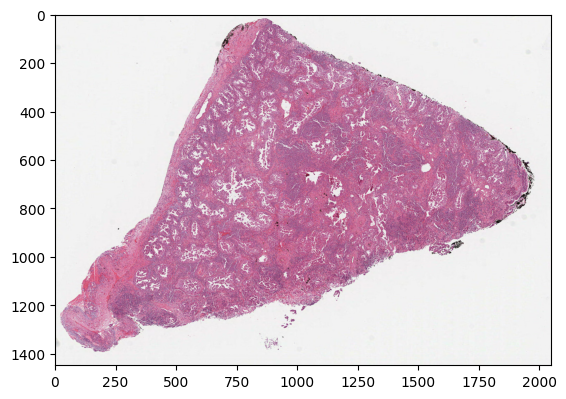

In [15]:
plt.imshow(slide.get_thumbnail((2048, 2048)))

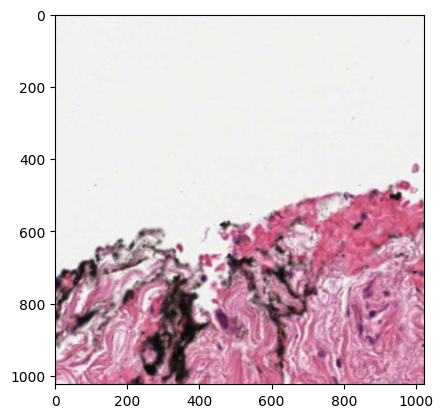

In [20]:
plt.imshow(processor.extract_tile(slide, *tile_coords[0]))